In [7]:
pip install kaggle


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chandraparsad03","key":"d95d74ec1c180c75dad1a1daa644cfa5"}'}

In [3]:
!ls


kaggle.json  sample_data


In [4]:
import shutil
import os

os.makedirs('/root/.kaggle', exist_ok=True)  # Create the folder if it doesn't exist
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")


'/root/.kaggle/kaggle.json'

In [5]:
!ls /root/.kaggle


kaggle.json


In [6]:
!pip install kaggle


In [8]:
!kaggle datasets download -d rishabhkausish/reddit-depression-dataset


Dataset URL: https://www.kaggle.com/datasets/rishabhkausish/reddit-depression-dataset
License(s): CC0-1.0


In [9]:
import zipfile

with zipfile.ZipFile('reddit-depression-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_folder')


In [10]:
import pandas as pd

df = pd.read_csv("dataset_folder/reddit_depression_dataset.csv")

df.fillna('', inplace=True)

df['text'] = df['title'] + " " + df['body']

print(df[['text', 'label']].head())

print("Label distribution:")
print(df['label'].value_counts())


<ipython-input-10-4016ca216770>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_folder/reddit_depression_dataset.csv")
<ipython-input-10-4016ca216770>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


                                                text label
0  Deep thoughts underdog Only when we start cons...   0.0
1  I like this sub, there's only two posts yet I ...   0.0
2  Rebirth! Hello. \nI am the new guy in charge h...   0.0
3  "I want to be like water. I want to slip throu...   0.0
4  Who am I? You could take any one cell in my bo...   0.0
Label distribution:
label
0.0    1990261
1.0     480411
           106
Name: count, dtype: int64


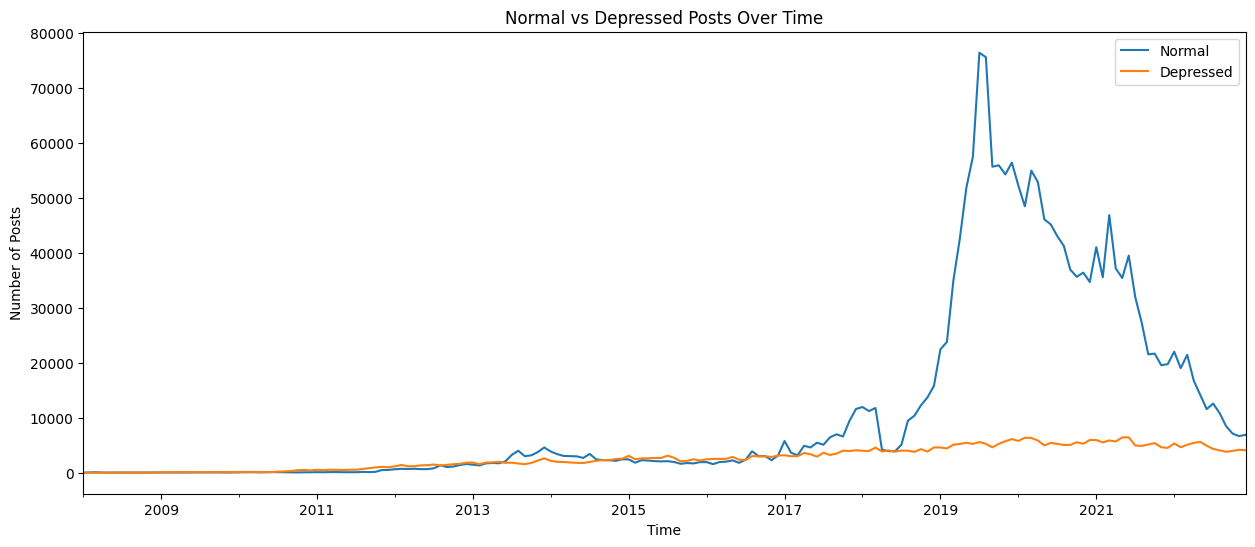

In [11]:
import matplotlib.pyplot as plt

df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s', errors='coerce')
df = df[df['created_utc'].notnull() & df['label'].notnull()]
df['label'] = df['label'].astype(int)
df['year_month'] = df['created_utc'].dt.to_period('M')
timeline = df.groupby(['year_month', 'label']).size().unstack().fillna(0)
timeline.columns = ['Normal', 'Depressed']
timeline.plot(figsize=(15, 6))
plt.title("Normal vs Depressed Posts Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Posts")
plt.show()


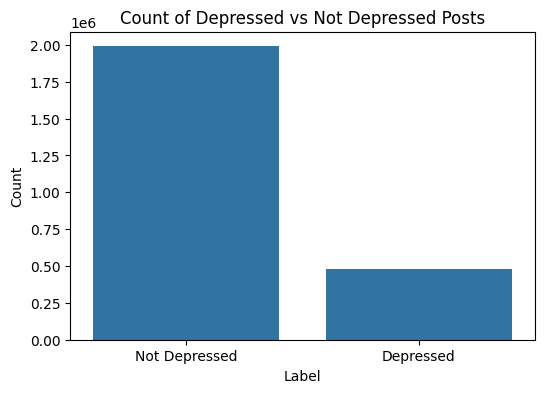

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df['label'] = df['label'].astype(int)

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.title('Count of Depressed vs Not Depressed Posts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [13]:
df.head()

,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label,text,year_month
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,2014-07-14 03:35:09,,0,Deep thoughts underdog Only when we start cons...,2014-07
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,2014-09-13 00:31:19,1.0,0,"I like this sub, there's only two posts yet I ...",2014-09
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,2014-11-20 04:31:58,1.0,0,Rebirth! Hello. \nI am the new guy in charge h...,2014-11
3,47959,DeepThoughts,"""I want to be like water. I want to slip throu...",,25.0,2014-11-20 19:38:05,2.0,0,"""I want to be like water. I want to slip throu...",2014-11
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,2014-11-20 20:36:52,4.0,0,Who am I? You could take any one cell in my bo...,2014-11


In [14]:
df.head()

,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label,text,year_month
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,2014-07-14 03:35:09,,0,Deep thoughts underdog Only when we start cons...,2014-07
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,2014-09-13 00:31:19,1.0,0,"I like this sub, there's only two posts yet I ...",2014-09
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,2014-11-20 04:31:58,1.0,0,Rebirth! Hello. \nI am the new guy in charge h...,2014-11
3,47959,DeepThoughts,"""I want to be like water. I want to slip throu...",,25.0,2014-11-20 19:38:05,2.0,0,"""I want to be like water. I want to slip throu...",2014-11
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,2014-11-20 20:36:52,4.0,0,Who am I? You could take any one cell in my bo...,2014-11


In [15]:
df = df.dropna()


In [16]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 581.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6006/6006 ━━━━━━━━━━━━━━━━━━━━ 539s 89ms/step - accuracy: 0.9092 - loss: 0.2330 - val_accuracy: 0.9287 - val_loss: 0.1866
Epoch 2/10
6006/6006 ━━━━━━━━━━━━━━━━━━━━ 533s 89ms/step - accuracy: 0.9309 - loss: 0.1830 - val_accuracy: 0.9307 - val_loss: 0.1821
Epoch 3/10
6006/6006 ━━━━━━━━━━━━━━━━━━━━ 533s 89ms/step - accuracy: 0.9353 - loss: 0.1717 - val_accuracy: 0.9314 - val_loss: 0.1807
Epoch 4/10
6006/6006 ━━━━━━━━━━━━━━━━━━━━ 533s 89ms/step - accuracy: 0.9391 - loss: 0.1619 - val_accuracy: 0.9311 - val_loss: 0.1799
Epoch 5/10
6006/6006 ━━━━━━━━━━━━━━━━━━━━ 544s 91ms/step - accuracy: 0.9430 - loss: 0.1524 - val_accuracy: 0.9306 - val_loss: 0.1892
Epoch 6/10
6006/6006 ━━━━━━━━━━━━━━━━━━━━ 534s 89ms/step - accuracy: 0.9468 - loss: 0.1435 - val_accuracy: 0.9300 - val_loss: 0.1919
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9297 - loss: 0.1824
Test Loss: 0.1799, Test Accuracy: 0.9311
6006/6006 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step


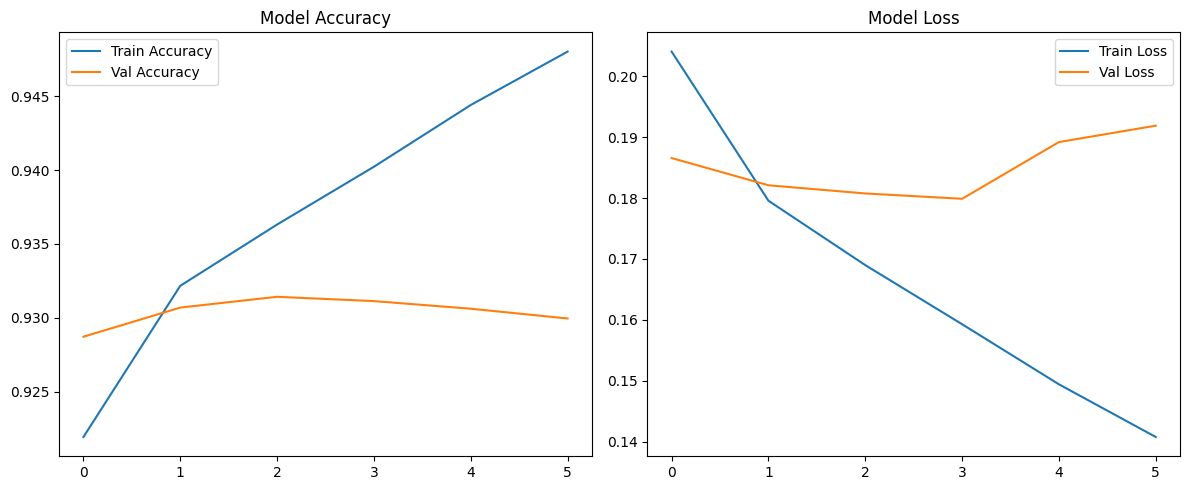

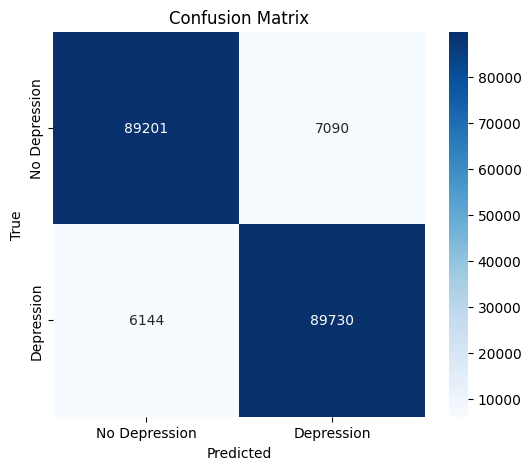

               precision    recall  f1-score   support

No Depression       0.94      0.93      0.93     96291
   Depression       0.93      0.94      0.93     95874

     accuracy                           0.93    192165
    macro avg       0.93      0.93      0.93    192165
 weighted avg       0.93      0.93      0.93    192165



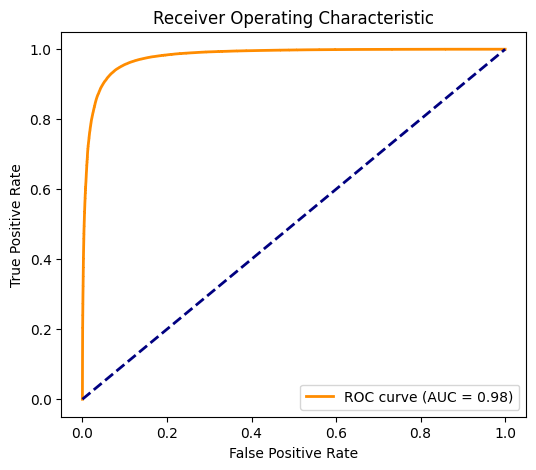

AUC: 0.9798


NameError: name 'gc' is not defined

In [17]:
# from sklearn.utils import resample
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.graph_objects as go
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# depressed = df[df['label'] == 1]
# non_depressed = df[df['label'] == 0]

# n_samples = min(len(depressed), len(non_depressed))
# depressed_sample = depressed.sample(n=n_samples, random_state=42)
# non_depressed_sample = non_depressed.sample(n=n_samples, random_state=42)
# df_balanced = pd.concat([depressed_sample, non_depressed_sample]).sample(frac=1, random_state=42)

# X = df_balanced['text'].astype(str)
# y = df_balanced['label'].astype(int)

# max_words = 5000
# max_len = 80

# tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
# tokenizer.fit_on_texts(X)
# X_seq = tokenizer.texts_to_sequences(X)
# X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

# X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# def create_dataset(X, y, batch_size=128):
#     dataset = tf.data.Dataset.from_tensor_slices((X, y))
#     dataset = dataset.shuffle(buffer_size=10000)
#     dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
#     return dataset

# train_dataset = create_dataset(X_train, y_train)
# test_dataset = create_dataset(X_test, y_test)

# model = Sequential([
#     Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
#     Bidirectional(LSTM(32)),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# early_stop = EarlyStopping(patience=2, restore_best_weights=True)

# history = model.fit(
#     train_dataset,
#     validation_data=test_dataset,
#     epochs=10,
#     callbacks=[early_stop]
# )

# loss, acc = model.evaluate(test_dataset)
# print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

# y_proba = model.predict(X_test)
# y_pred = (y_proba > 0.5).astype("int32")

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.title('Model Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title('Model Loss')
# plt.legend()
# plt.tight_layout()
# plt.show()

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['No Depression', 'Depression'],
#             yticklabels=['No Depression', 'Depression'])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# print(classification_report(y_test, y_pred, target_names=['No Depression', 'Depression']))

# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(6, 5))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.show()

# print(f"AUC: {roc_auc:.4f}")

# label_counts = df_balanced['label'].value_counts()
# labels = ['No Depression', 'Depression']
# fig = go.Figure(data=[go.Pie(labels=labels, values=label_counts, hole=.5)])
# fig.update_layout(title_text='Balanced Dataset Distribution')
# fig.show()

# del X_seq, X_pad, X_train, X_test, y_train, y_test, tokenizer, history
# gc.collect()


# CNN based approach



In [ ]:
from sklearn.utils import resample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

depressed = df[df['label'] == 1]
non_depressed = df[df['label'] == 0]

n_samples = min(len(depressed), len(non_depressed))
depressed_sample = depressed.sample(n=n_samples, random_state=42)
non_depressed_sample = non_depressed.sample(n=n_samples, random_state=42)
df_balanced = pd.concat([depressed_sample, non_depressed_sample]).sample(frac=1, random_state=42)

X = df_balanced['text'].astype(str)
y = df_balanced['label'].astype(int)

max_words = 5000
max_len = 80

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

def create_dataset(X, y, batch_size=128):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size=10000)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(X_train, y_train)
test_dataset = create_dataset(X_test, y_test)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop]
)

loss, acc = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

y_proba = model.predict(X_test)
y_pred = (y_proba > 0.5).astype("int32")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.tight_layout()
plt.savefig('model_accuracy_loss.png')
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=['No Depression', 'Depression']))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")

label_counts = df_balanced['label'].value_counts()
labels = ['No Depression', 'Depression']
fig = go.Figure(data=[go.Pie(labels=labels, values=label_counts, hole=.5)])
fig.update_layout(title_text='Balanced Dataset Distribution')
fig.show()

del X_seq, X_pad, X_train, X_test, y_train, y_test, tokenizer, history
gc.collect()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



6006/6006 ━━━━━━━━━━━━━━━━━━━━ 550s 91ms/step - accuracy: 0.9087 - loss: 0.2339 - val_accuracy: 0.9290 - val_loss: 0.1861
Epoch 2/10
6006/6006 ━━━━━━━━━━━━━━━━━━━━ 544s 91ms/step - accuracy: 0.9308 - loss: 0.1830 - val_accuracy: 0.9308 - val_loss: 0.1817
Epoch 3/10
6006/6006 ━━━━━━━━━━━━━━━━━━━━ 542s 90ms/step - accuracy: 0.9350 - loss: 0.1719 - val_accuracy: 0.9310 - val_loss: 0.1829
Epoch 4/10
3947/6006 ━━━━━━━━━━━━━━━━━━━━ 2:54 85ms/step - accuracy: 0.9383 - loss: 0.1640

In [ ]:
# ======== Imports ========
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import gc

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ======== Assume you already have these ========
# Variables: max_words, max_len, X_train, y_train, X_test, y_test
# Tokenized and padded data
# train_dataset and test_dataset are tf.data.Dataset objects or (X_train, y_train), etc.
# df_balanced is the dataframe with balanced class labels

# ======== CNN Model ========
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_cnn = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ======== Training ========
history_cnn = model_cnn.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop]
)

# ======== Evaluation ========
loss_cnn, acc_cnn = model_cnn.evaluate(test_dataset)
print(f"Test Loss: {loss_cnn:.4f}, Test Accuracy: {acc_cnn:.4f}")

# ======== Predictions ========
y_proba_cnn = model_cnn.predict(X_test)
y_pred_cnn = (y_proba_cnn > 0.5).astype("int32")

# ======== Classification Report ========
print(classification_report(y_test, y_pred_cnn, target_names=['No Depression', 'Depression']))

# ======== Accuracy and Loss Plot ========
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ======== Confusion Matrix ========
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ======== ROC Curve ========
fpr, tpr, thresholds = roc_curve(y_test, y_proba_cnn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")

# ======== Dataset Pie Chart ========
label_counts = df_balanced['label'].value_counts()
labels = ['No Depression', 'Depression']
fig = go.Figure(data=[go.Pie(labels=labels, values=label_counts, hole=.5)])
fig.update_layout(title_text='Balanced Dataset Distribution')
fig.show()

# ======== Memory Cleanup ========
del X_train, X_test, y_train, y_test, history_cnn
gc.collect()


# MLP Based Approach

```
# This is formatted as code
```



In [ ]:
import gc

model_mlp = Sequential([
    Dense(128, input_dim=max_len, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_mlp = model_mlp.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop]
)

loss_mlp, acc_mlp = model_mlp.evaluate(test_dataset)
print(f"Test Loss: {loss_mlp:.4f}, Test Accuracy: {acc_mlp:.4f}")

y_proba_mlp = model_mlp.predict(X_test)
y_pred_mlp = (y_proba_mlp > 0.5).astype("int32")

print(classification_report(y_test, y_pred_mlp, target_names=['No Depression', 'Depression']))


# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_mlp, target_names=['No Depression', 'Depression']))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_mlp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")

label_counts = df_balanced['label'].value_counts()
labels = ['No Depression', 'Depression']
fig = go.Figure(data=[go.Pie(labels=labels, values=label_counts, hole=.5)])
fig.update_layout(title_text='Balanced Dataset Distribution')
fig.show()

del X_seq, X_pad, X_train, X_test, y_train, y_test, tokenizer, history_mlp
gc.collect()


In [ ]:
# Attention Mechanism-based Approach
import gc

from tensorflow.keras.layers import Attention, Concatenate

input_layer = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=64)(input_layer)
lstm_layer = Bidirectional(LSTM(32, return_sequences=True))(embedding_layer)
attention_layer = Attention()([lstm_layer, lstm_layer])
attention_output = Concatenate()([lstm_layer, attention_layer])
attention_output = GlobalMaxPooling1D()(attention_output)
dropout_layer = Dropout(0.3)(attention_output)
dense_layer = Dense(32, activation='relu')(dropout_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_attention = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_attention.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_attention = model_attention.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop]
)

loss_attention, acc_attention = model_attention.evaluate(test_dataset)
print(f"Test Loss: {loss_attention:.4f}, Test Accuracy: {acc_attention:.4f}")

y_proba_attention = model_attention.predict(X_test)
y_pred_attention = (y_proba_attention > 0.5).astype("int32")

print(classification_report(y_test, y_pred_attention, target_names=['No Depression', 'Depression']))

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_attention.history['accuracy'], label='Train Accuracy')
plt.plot(history_attention.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_attention.history['loss'], label='Train Loss')
plt.plot(history_attention.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_attention)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_attention, target_names=['No Depression', 'Depression']))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_attention)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")

label_counts = df_balanced['label'].value_counts()
labels = ['No Depression', 'Depression']
fig = go.Figure(data=[go.Pie(labels=labels, values=label_counts, hole=.5)])
fig.update_layout(title_text='Balanced Dataset Distribution')
fig.show()

del X_seq, X_pad, X_train, X_test, y_train, y_test, tokenizer, history_attention
gc.collect()


In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import gc


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_texts(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=80, return_tensors='tf')

X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X, y, test_size=0.2, random_state=42)

train_encodings = encode_texts(X_train_bert)
test_encodings = encode_texts(X_test_bert)

train_dataset_bert = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train_bert
))

test_dataset_bert = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test_bert
))

model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model_bert.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_bert = model_bert.fit(train_dataset_bert.batch(16), epochs=3, batch_size=16, validation_data=test_dataset_bert.batch(16))

loss_bert, acc_bert = model_bert.evaluate(test_dataset_bert.batch(16))
print(f"Test Loss: {loss_bert:.4f}, Test Accuracy: {acc_bert:.4f}")

y_pred_bert = model_bert.predict(test_dataset_bert.batch(16)).logits
y_pred_bert = tf.argmax(y_pred_bert, axis=1).numpy()

print(classification_report(y_test_bert, y_pred_bert, target_names=['No Depression', 'Depression']))

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_bert.history['accuracy'], label='Train Accuracy')
plt.plot(history_bert.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_bert.history['loss'], label='Train Loss')
plt.plot(history_bert.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_bert, y_pred_bert)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test_bert, y_pred_bert, target_names=['No Depression', 'Depression']))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_bert, y_pred_bert)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")

label_counts = df_balanced['label'].value_counts()
labels = ['No Depression', 'Depression']
fig = go.Figure(data=[go.Pie(labels=labels, values=label_counts, hole=.5)])
fig.update_layout(title_text='Balanced Dataset Distribution')
fig.show()

del X_seq, X_pad, X_train, X_test, y_train, y_test, tokenizer, history_bert
gc.collect()

